# Training Audio U-Net

This script allows to visualise the Audio U-Net Neural Network and train it with a pre-compiled dataset.

In [1]:
import sys 
import numpy as np
sys.path.insert(0, '/Users/omkarpatil/Documents/event_based_visual_microphone/bandwidth_extension/')
import audio_unet as au
sys.path.insert(0, '/Users/omkarpatil/Documents/event_based_visual_microphone/utilities/')
import utility_folders as uf
import utility_spectrogram as us

/Users/omkarpatil/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


**Visualising Audio U-Net Model**

The model bellow shows the neural network architecture.

In [2]:
audio_unet = au.AudioUNet()
audio_unet.show()

Model: "Network"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 4096, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 2048, 512) │      5,120 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 2048, 512) │          0 │ conv1d[0][0]      │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 1024, 512) │  2,359,808 │ leaky_re_lu[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 1024, 512) │          0 │ conv1d_1[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 512, 512)  │  2,359,808 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 512, 512)  │          0 │ conv1d_2[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 256, 1024) │  4,719,616 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 256, 1024) │          0 │ conv1d_3[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 128, 1024) │  9,438,208 │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 1024) │          0 │ conv1d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 128, 2048) │ 18,876,416 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 2048) │          0 │ conv1d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 128, 2048) │          0 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sub_pixel_shift     │ (None, 256, 1024) │          0 │ re_lu[0][0]       │
│ (SubPixelShift)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256, 2048) │          0 │ sub_pixel_shift[… │
│ (Concatenate)       │                   │            │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 256, 1024) │ 18,875,392 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256, 1024) │          0 │ conv1d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 256, 1024) │          0 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sub_pixel_shift_1   │ (None, 512, 512)  │          0 │ re_lu_1[0][0]     │
│ (SubPixelShift)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 512, 1024) │          0 │ sub_pixel_shift_

 Total params: 75,529,218 (288.12 MB)

 Trainable params: 75,529,218 (288.12 MB)

 Non-trainable params: 0 (0.00 B)

**Training Dataset**

The code bellow allows to compile the training dataset. For speech this is from a VCTK Corpus 48kHz sample rate audio data.

<span style="color:red"> Provide the file path to the label and data datasets: </span>

In [3]:
label_dataset_path = '/Volumes/Omkar 5T/audio_dataset/test_label/label.npy'
data_dataset_path = '/Volumes/Omkar 5T/audio_dataset/test_data/data.npy'

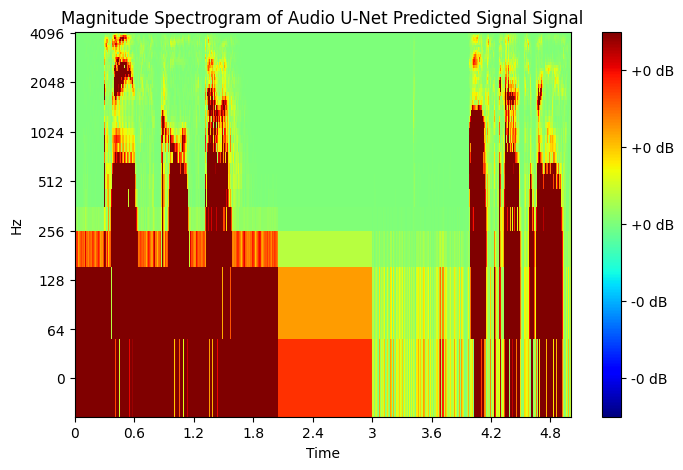

In [5]:
X_train = np.load(data_dataset_path)
X_train = X_train[:, :, np.newaxis]
y_train = np.load(label_dataset_path)
y_train = y_train[:, :, np.newaxis]

The code bellow compiles and fits the neural network with the training dataset.

In [5]:
audio_unet.compile(learning_rate=5*10e-4)
audio_unet.fit(X_train, y_train, batch_size=32, epochs=50)
audio_unet.save('model.h5')

Epoch 1/50
 1/19 ━━━━━━━━━━━━━━━━━━━━ 3:42 12s/step - loss: 0.0121 - lsd: 1.5417 - snr: -inf

KeyboardInterrupt: 